In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data_file='https://raw.githubusercontent.com/Amm521/Proyecto-Analisis-de-ciencia-de-datos/main/Final_dataset.csv'
df=pd.read_csv(data_file)
df.head()
# df.shape

<ipython-input-2-64425634d77e>:2: DtypeWarning: Columns (140,144,148,152,156,160,164,168,172,176,180,184,188,192,196,220,224,228,240,244,252,256,260,268,272,276,436,456,469,471,473,479,553,946,1066,1077,1180,1433,1691,1731,1786,1801,1814,1821,1871,1887,1963,1977,2219) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(data_file)


,Unnamed: 0,ID_VIV,ID_PER,UPM,VIV_SEL,HOGAR,N_REN,DOMINIO,CVE_ENT,NOM_ENT,...,P2_15,P2_16,P2_5,P2_6,P2_8,P2_9,PAREN,REN_INF_AD,REN_MUJ_EL,SEXO
0,0,1400004.01,1400004.01.1.02,1400004,1,1,2,U,14,JALISCO,...,1.0,5.0,96,96,NaN,2.0,2,2.0,2.0,2
1,1,1400004.02,1400004.02.1.02,1400004,2,1,2,U,14,JALISCO,...,1.0,5.0,97,97,NaN,2.0,2,NaN,2.0,2
2,2,1400014.03,1400014.03.1.02,1400014,3,1,2,U,14,JALISCO,...,NaN,5.0,96,96,NaN,2.0,2,2.0,2.0,2
3,3,1400038.01,1400038.01.1.02,1400038,1,1,2,U,14,JALISCO,...,6.0,6.0,1,97,NaN,1.0,3,NaN,2.0,2
4,4,1400038.02,1400038.02.1.01,1400038,2,1,1,U,14,JALISCO,...,1.0,6.0,97,97,NaN,2.0,1,1.0,1.0,2


In [ ]:
df.isna().sum()

Unnamed: 0       0
ID_VIV           0
ID_PER           0
UPM              0
VIV_SEL          0
              ... 
P2_9             0
PAREN            0
REN_INF_AD    1308
REN_MUJ_EL       0
SEXO             0
Length: 2241, dtype: int64

In [ ]:
nan_var = df.isna().sum()
cols=list(nan_var[nan_var<=150].index)
df=df[cols]

In [ ]:
n_cols=[]
ob_cols=[]
i=0
for col in df.dtypes:
    if col!=object:
        n_cols.append(cols[i])
    else:
        ob_cols.append(cols[i])
    i+=1
fp=['VTOT_A','VSEX_A','VPSI_A','VCOM_A','VTOT_12M','VPSI_12M','VFIS_A','VECO_A','VSEX_12M','VCOM_12M','VECO_12M','VESC_A','Unnamed: 0','UPM'
,'VFAM','UPM_DIS','VFIS_12M','POB_L_12M']
for i in fp:
    n_cols.pop(n_cols.index(i))
n_cols.append('T_INSTRUM')
print(n_cols)
print(ob_cols)

['ID_VIV', 'VIV_SEL', 'HOGAR', 'N_REN', 'CVE_ENT', 'CVE_MUN', 'POBT', 'POBP', 'POB_E_A', 'POB_L_A', 'POB_E_12M', 'FAC_VIV', 'FAC_MUJ', 'ESTRATO', 'EST_DIS', 'PE5_1', 'PE5_10', 'PE5_11', 'PE5_12', 'PE5_13', 'PE5_14', 'PE5_15', 'PE5_2', 'PE5_3', 'PE5_4', 'PE5_5', 'PE5_6', 'PE5_7', 'PE5_8', 'PE5_9', 'P3_1', 'P4_1', 'P4_11', 'P4_12_1', 'P4_12_2', 'P4_12_3', 'P4_12_4', 'P4_12_5', 'P4_12_6', 'P4_12_7', 'P4_8_1', 'P4_8_2', 'P4_8_3', 'P4_8_4', 'P4_8_5', 'P4_8_6', 'P4_8_7', 'P9_1_1', 'P9_1_10', 'P9_1_11', 'P9_1_12', 'P9_1_13', 'P9_1_14', 'P9_1_15', 'P9_1_16', 'P9_1_2', 'P9_1_3', 'P9_1_4', 'P9_1_5', 'P9_1_6', 'P9_1_7', 'P9_1_8', 'P9_1_9', 'P5_1', 'P5_3_1', 'P5_3_2', 'P5_3_3', 'P5_3_4', 'P5_3_5', 'P5_3_6', 'P5_3_7', 'P6_1_1', 'P6_1_2', 'P6_1_3', 'P6_1_4', 'P6_1_5', 'P6_2_1', 'P6_2_2', 'P6_2_3', 'P6_2_4', 'P7_1', 'P7_11', 'P7_2', 'P7_6_1', 'P7_6_10', 'P7_6_11', 'P7_6_12', 'P7_6_13', 'P7_6_14', 'P7_6_15', 'P7_6_16', 'P7_6_17', 'P7_6_18', 'P7_6_2', 'P7_6_3', 'P7_6_4', 'P7_6_5', 'P7_6_6', 'P7_6_7', '

In [ ]:
df.dropna(inplace=True)
df=df.drop(df.loc[df['VTOT_A']==9].index)
# print(df['T_INSTRUM'].isna().sum())
print(df.shape)
df_ob=df[ob_cols]
df['ID_VIV']=df['ID_VIV'].apply(lambda x: int(x*10))
vals={'A1':0, 'C1':1, 'B2':2, 'B1':3, 'C2':4, 'A2':5}
df['T_INSTRUM']=df['T_INSTRUM'].apply(lambda x: vals[x])
df['ID_PER']=pd.to_numeric(df_ob['ID_PER'].apply(lambda x: x.replace('.','')))
dfg=pd.get_dummies(df,drop_first=True)

(3227, 214)


<ipython-input-6-301ccebf16ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
x=dfg[n_cols]
y=dfg["VTOT_A"]
x.shape
#50 = (3367, 174)    |     150 = (3238, 195)

(3227, 189)

<Axes: >

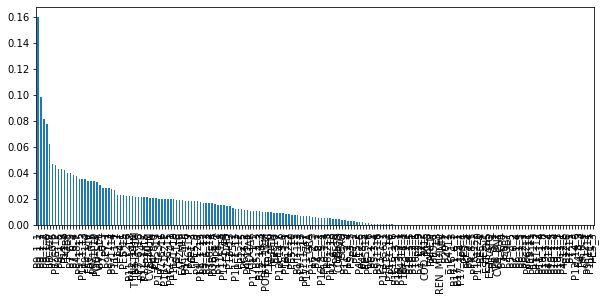

In [ ]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
mi = mutual_info_regression(x, y)

mi = pd.Series(mi)
mi.index = x.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

1.   Al menos dos algoritmos que hayamos visto en clase.::
2.   Expiicar en qué consisten y por qué son adecuados para responder las preguntas de interés.
3.   Describir cuales son las caracteristicas y cual es e! target o etiqueta.
4.   Explicar si los datos se estandarizaron y por que.
5.   Definir los tuning parameters de los algoritmos seleccionados.
6.   Determinar los mejores valores para los tuning parameters entrenando ambos aigoritmas con 3 valores diferentes para cada tuning parameter (NO es necesario utilizar CV).
7.   Entrenar los algortimos finales
8.   Reportar al menos dos métricas para medir el desempeño de los algoritmos elegidos.
9.   Elegir uno de los algoritmos y explicar porque se eligió.
10.   Interpretar los resultados en el contexto del problema
11.   Detallar los alcances y límitaciones de los resultados.
12.   ¿Con base en los resultados, es posible generar alguna política orientada a crear espacios seguros para las mujeres? Explíca.

In [ ]:
#1.- Algoritmos: Logictic Regresión and Decision Three

In [ ]:
#Logistic Regression
x=dfg[n_cols]
y=dfg["VTOT_A"]
x=x.astype(int)
x=x[mi.sort_values(ascending=False)[:17].index]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)
lr=LogisticRegression(penalty='none',max_iter=1000)
lr.fit(x_train,y_train)
# print(lr.intercept_, lr.coef_)
y_pred=lr.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
predicc = y_test == y_pred
print('Tasa de acierto:',predicc.sum()/len(predicc))
print(cm)
se=cm[1,1]/(cm[1,0]+cm[1,1])
sp=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensibilidad: ',se,'\nEspecificidad: ',sp)

Tasa de acierto: 0.7430340557275542
[[480   0]
 [166   0]]
Sensibilidad:  0.0 
Especificidad:  1.0


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
ma=0

In [ ]:
#KNN
x=dfg[n_cols]
y=dfg["VTOT_A"]
x=x.astype(int)
x=x[mi.sort_values(ascending=False)[:28].index]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)
k = np.sqrt(len(x_train))
knn = KNeighborsClassifier(n_neighbors = int(k))
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
predicc = y_test == y_pred
predicc.sum()/len(predicc)
print('Tasa de acierto:',predicc.sum()/len(predicc))
cm=confusion_matrix(y_test,y_pred)
print(cm)
se=cm[1,1]/(cm[1,0]+cm[1,1])
sp=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensibilidad: ',se,'\nEspecificidad: ',sp)

Tasa de acierto: 0.7476780185758514
[[475   5]
 [158   8]]
Sensibilidad:  0.04819277108433735 
Especificidad:  0.9895833333333334


In [ ]:
#Random forest
x=dfg[n_cols]
y=dfg["VTOT_A"]
x=x.astype(int)
vars=mi.sort_values(ascending=False)[:].index
print('Variables: ',vars)
x=x[vars]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)
rdm_forest=RandomForestClassifier(n_estimators=1000)
rdm_forest.fit(x_train,y_train)
y_pred_random_forest=rdm_forest.predict(x_test)
atinados_random_forest=y_pred_random_forest==y_test
atinados_random_forest.sum()/len(y_test)
print('Precisión',atinados_random_forest.sum()/len(y_test))
cm=confusion_matrix(y_test,y_pred_random_forest)
print(cm)
se=cm[1,1]/(cm[1,0]+cm[1,1])
sp=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensibilidad: ',se,'\nEspecificidad: ',sp)
ma=max(ma,atinados_random_forest.sum()/len(y_test))
ma

Variables:  Index(['P9_1_1', 'P9_1_7', 'P9_1_2', 'P9_1_8', 'ID_VIV', 'P7_6_6', 'P7_6_12',
       'P9_1_5', 'P9_1_9', 'P12_4',
       ...
       'P12_6', 'P7_11', 'P12_3', 'P12_14_6', 'P4_8_3', 'P4_8_4', 'P12_1',
       'P9_1_11', 'P11_1_5', 'PE5_3'],
      dtype='object', length=189)
Precisión 0.8839009287925697
[[440  40]
 [ 35 131]]
Sensibilidad:  0.7891566265060241 
Especificidad:  0.9166666666666666


0.8839009287925697

In [ ]:
for i in vars:
    print(i)

P9_1_1
P9_1_7
P9_1_2
P9_1_8
ID_VIV
P7_6_6
P7_6_12
P9_1_5
P9_1_9
P12_4
POBP
P7_6_9
P7_6_4
P4_8_7
P9_1_15
P11_1_13
P9_1_4
FAC_VIV
P7_6_5
P9_1_10
POB_L_A
VIV_SEL
P7_6_3
P7_1
P9_1_3
P9_1_14
P11_1_1
P12_7


In [ ]:
#Tree decision
x=dfg[n_cols]
y=dfg["VTOT_A"]
x=x.astype(int)
vars=mi.sort_values(ascending=False)[:28].index
print('Variables: ',vars)
x=x[vars]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
atinados=y_pred==y_test
print(atinados.sum()/len(y_test))
cm=confusion_matrix(y_test,y_pred)
print(cm)
se=cm[1,1]/(cm[1,0]+cm[1,1])
sp=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensibilidad: ',se,'\nEspecificidad: ',sp)

Variables:  Index(['P9_1_1', 'P9_1_7', 'P9_1_2', 'P9_1_8', 'ID_VIV', 'P7_6_6', 'P7_6_12',
       'P9_1_5', 'P9_1_9', 'P12_4', 'POBP', 'P7_6_9', 'P7_6_4', 'P4_8_7',
       'P9_1_15', 'P11_1_13', 'P9_1_4', 'FAC_VIV', 'P7_6_5', 'P9_1_10',
       'POB_L_A', 'VIV_SEL', 'P7_6_3', 'P7_1', 'P9_1_3', 'P9_1_14', 'P11_1_1',
       'P12_7'],
      dtype='object')
0.8204334365325078
[[422  58]
 [ 58 108]]
Sensibilidad:  0.6506024096385542 
Especificidad:  0.8791666666666667


[Text(0.1732115027870658, 0.9875, 'P9_1_1 <= 1.5\n2581\n[1851, 730]\nNegative'),
 Text(0.16996606668158912, 0.9625, '946\n[946, 0]\nNegative'),
 Text(0.17645693889254246, 0.9625, 'P7_6_6 <= 1.5\n1635\n[905, 730]\nNegative'),
 Text(0.1732115027870658, 0.9375, '193\n[193, 0]\nNegative'),
 Text(0.17970237499801914, 0.9375, 'P9_1_7 <= 1.5\n1442\n[712, 730]\nPositive'),
 Text(0.17645693889254246, 0.9125, '111\n[111, 0]\nNegative'),
 Text(0.1829478111034958, 0.9125, 'P9_1_9 <= 1.5\n1331\n[601, 730]\nPositive'),
 Text(0.17970237499801914, 0.8875, '68\n[68, 0]\nNegative'),
 Text(0.18619324720897248, 0.8875, 'P7_6_4 <= 1.5\n1263\n[533, 730]\nPositive'),
 Text(0.1829478111034958, 0.8625, '39\n[39, 0]\nNegative'),
 Text(0.18943868331444916, 0.8625, 'P9_1_2 <= 1.5\n1224\n[494, 730]\nPositive'),
 Text(0.18619324720897248, 0.8375, '38\n[38, 0]\nNegative'),
 Text(0.19268411941992583, 0.8375, 'P12_4 <= 2.5\n1186\n[456, 730]\nPositive'),
 Text(0.11495943204868155, 0.8125, 'FAC_VIV <= 442.5\n173\n[98, 7

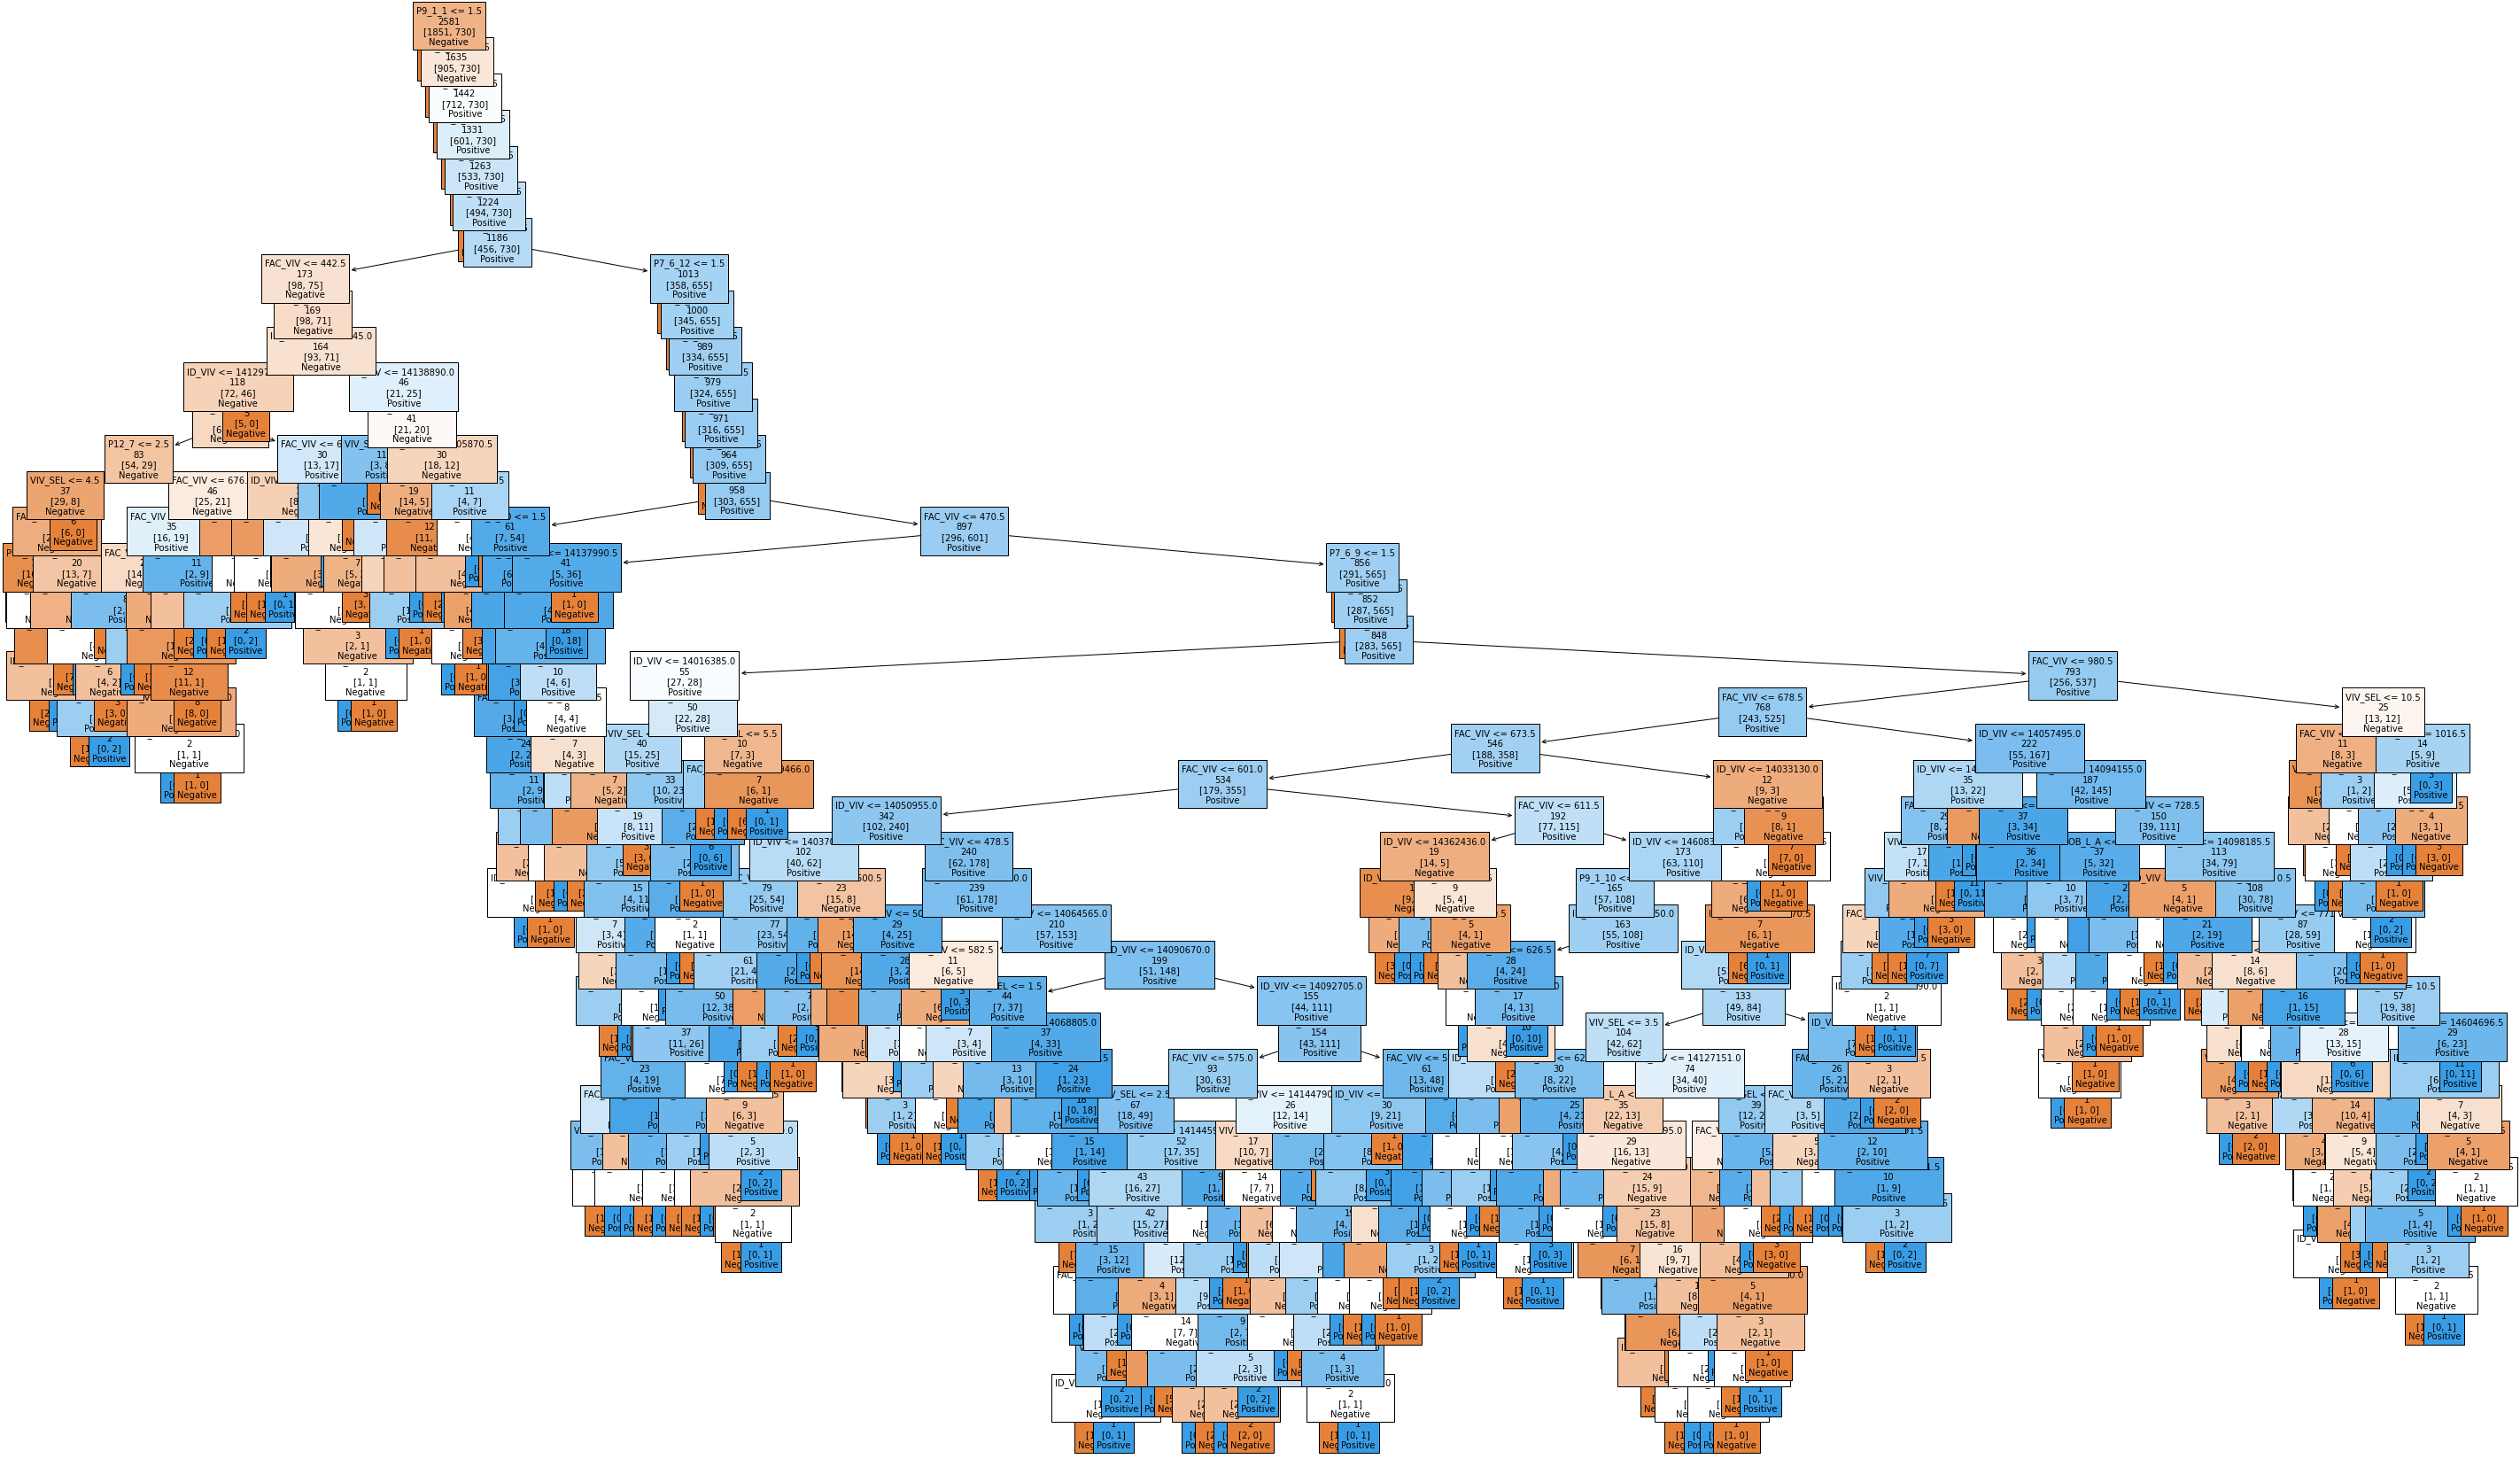

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,30))
plot_tree(tree,feature_names=vars,class_names=['Negative','Positive'],
          fontsize=10, label='none',impurity=False,filled=True)

In [ ]:
#Es adecuado debido a que las preguntas son categoricas en su mayoría, por lo que es de cierto modo más relevante los datos que obtengamos
#a partir de estos datos, y el Decision Three por la misma razón, al ser datos categoricos
#